
Hugging face agents:

is used to prefom specific task in LLM.


---
Hugging face pipeline for text generation:

Model download

Parameter setting

Text query(user write what he want)

generate text


---
HF inference endpoints:

process that use pre trained models to make prediction.




---
Give feedback on the image generation and explore different models available on the Hugging Face website

generate text that describe image
models:
Llama 3.1



##Part 1: Generate Captions for Images

In [73]:
from transformers import CLIPProcessor, CLIPModel

point= 'openai/clip-vit-base-patch32'

model = CLIPModel.from_pretrained(point)
processor = CLIPProcessor.from_pretrained(point)



In [74]:
from google.colab import files

In [75]:
uplod= files.upload()

Saving Doc-P-486967-638503994664327622.jpg to Doc-P-486967-638503994664327622.jpg
Saving GiraffaCamelopardalisTippelskirchi-Masaai-Mara.JPG to GiraffaCamelopardalisTippelskirchi-Masaai-Mara.JPG
Saving images (1).jfif to images (1).jfif
Saving images (2).jfif to images (2).jfif
Saving images.jfif to images.jfif
Saving Male_lion_picture._Shot_by_Vikta_JuiceBoy.jpg to Male_lion_picture._Shot_by_Vikta_JuiceBoy.jpg
Saving photo.jpg to photo.jpg
Saving photo-1533450718592-29d45635f0a9.jfif to photo-1533450718592-29d45635f0a9.jfif
Saving pngtree-golden-retriever-dog-running-on-white-background-png-image_7096062.jpg to pngtree-golden-retriever-dog-running-on-white-background-png-image_7096062 (3).jpg


In [76]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests
# Create a list to store images
images = []
# Loop and open each image

for filename in uplod.keys ():
  # Open the image file
  image = Image.open(filename)
  images.append(image)



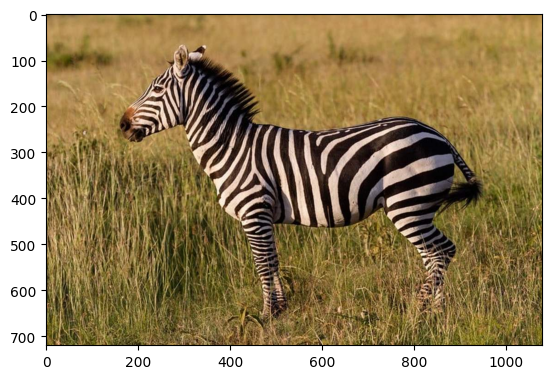

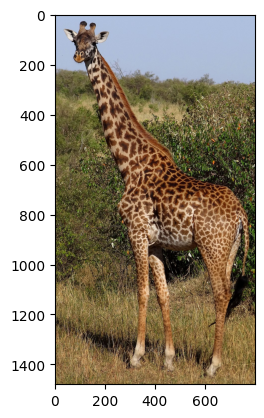

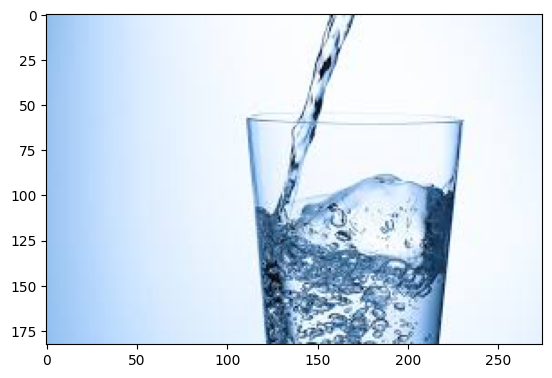

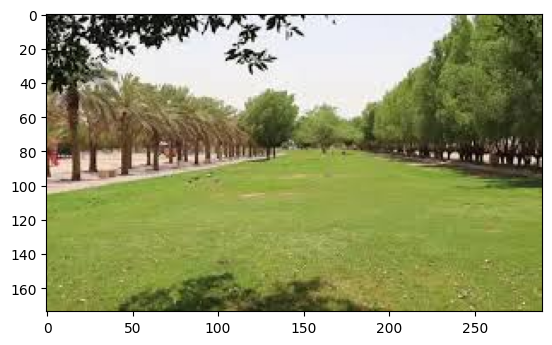

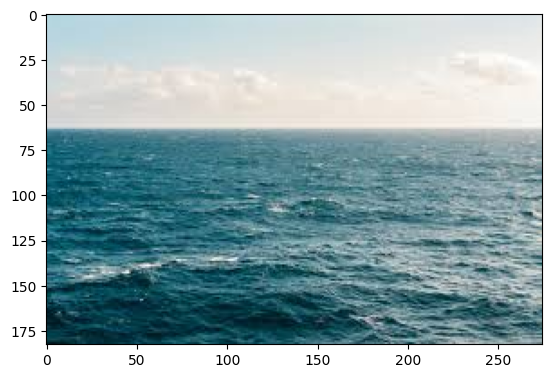

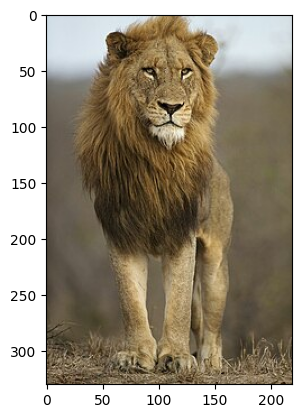

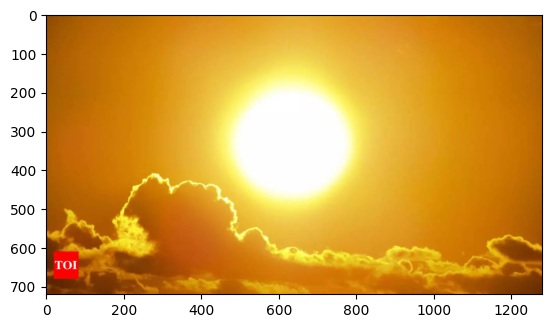

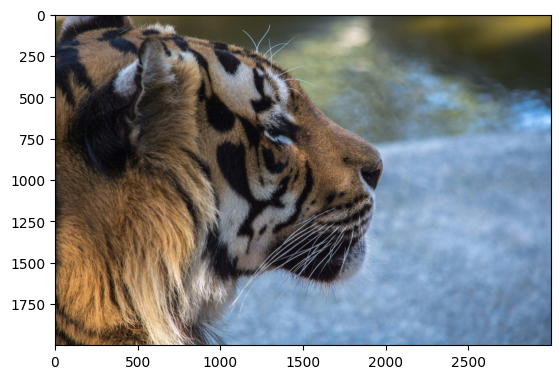

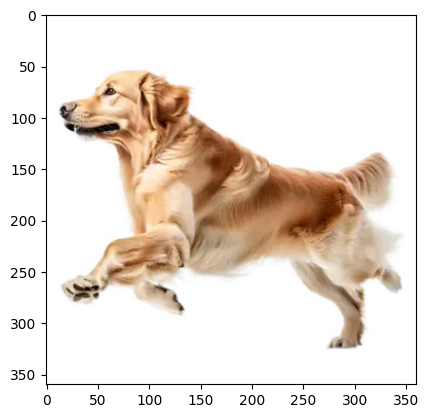

In [77]:
for image in images:
  plt.imshow(np.asarray(image))
  plt.show()


In [78]:
captions = ["a dog sitting on the grass",
            "A red rose in the garden",
            "Dog running", ]


inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

prob = outputs.logits_per_image.argmax(dim=1)
prob

tensor([2, 0, 2, 2, 2, 2, 2, 0, 2])

In [80]:
from transformers import AutoProcessor, AutoModelForSeq2SeqLM

# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")


In [93]:
captions=[]

for image in images:
  caption= pipe(image)[0]['generated_text']
  captions.append(caption)

print(captions)

['a zebra standing in tall grass', 'a gi gife standing in a field of grass', 'a glass of water', 'a park with trees and grass', 'a boat sailing on the ocean', 'a lion standing on top of a dry grass covered field', 'the sun is shining brightly in the sky', 'a tiger looking at something in the distance', 'a dog is jumping in the air']



##Part 2: Build an Image Search Engine

In [95]:
captions =  [input("input ")]


inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

prob = outputs.logits_per_image.argmax()
prob

input  zebra


tensor(0)

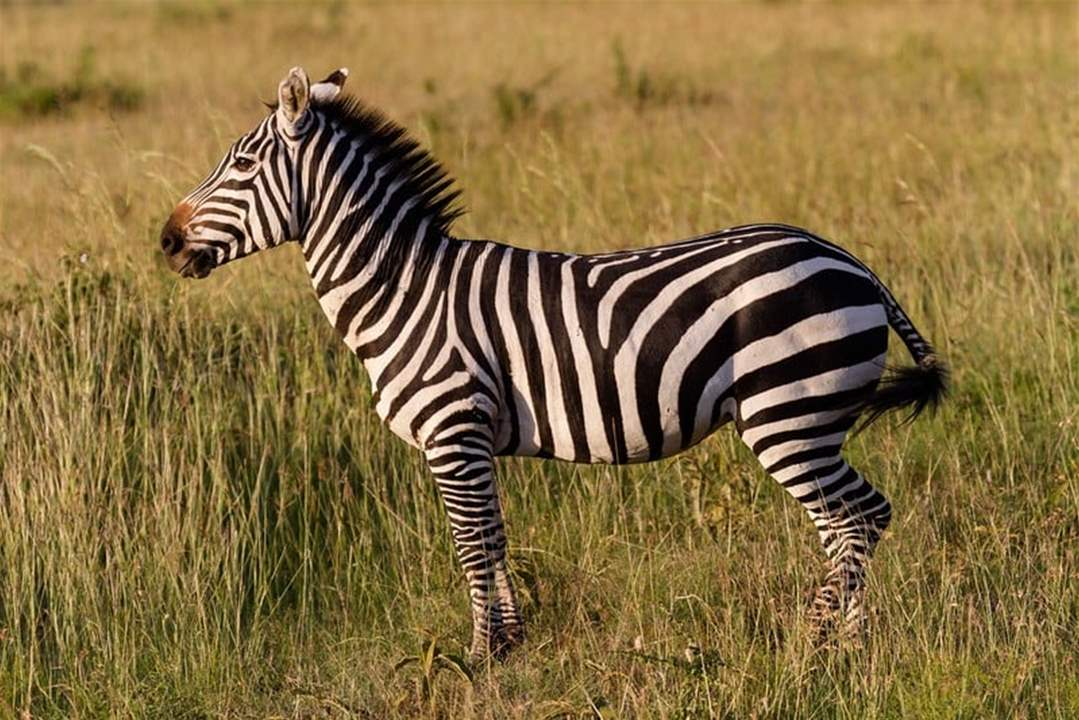

In [97]:
images[prob.item()]